Step-by-Step Process for Linear Regression
Data Preparation
Exploratory Data Analysis (EDA)
Splitting the Data
Building the Linear Regression Model
Evaluating Linear Regression Assumptions
Model Evaluation
Feature Selection

## 1. Data Preparation
First, let's load the Boston Housing dataset and prepare the data.

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='MEDV')

# Display the first few rows of the dataset
print(X.head())
print(y.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MEDV, dtype: float64


## 2. Exploratory Data Analysis (EDA)
Performing EDA helps to understand the data and identify any potential issues.

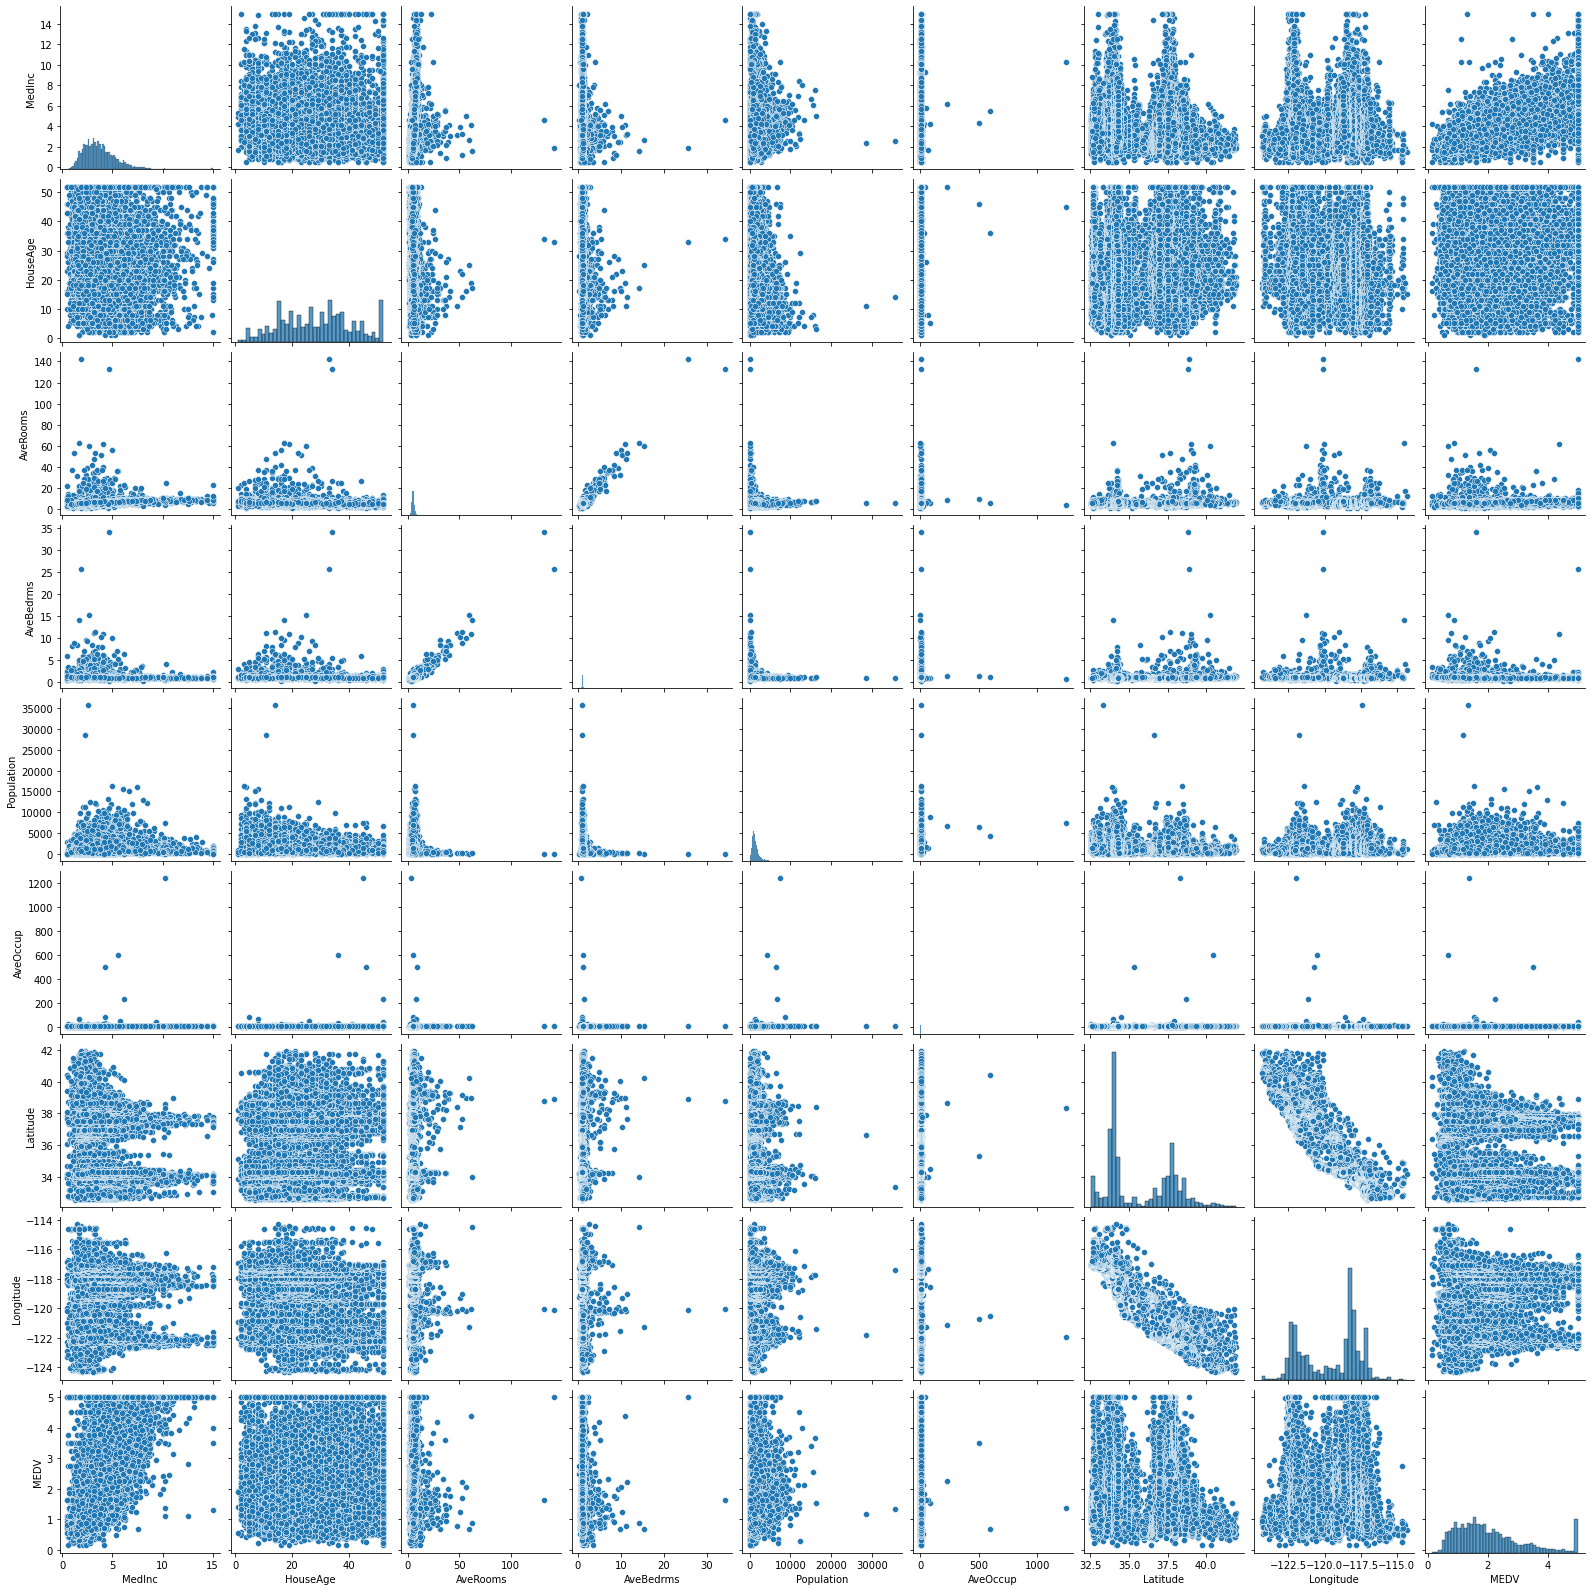

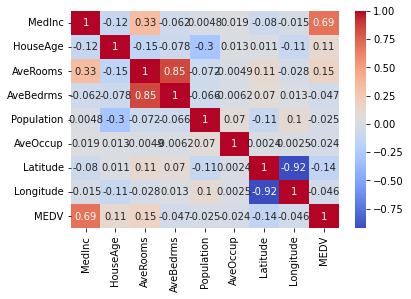

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships
sns.pairplot(pd.concat([X, y], axis=1))
plt.show()

# Correlation matrix
correlation_matrix = pd.concat([X, y], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Checking for missing values
print(X.isnull().sum())


## 3. Splitting the Data
Split the dataset into training and testing sets.

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')


Training data shape: (16512, 8)
Testing data shape: (4128, 8)


## 4. Building the Linear Regression Model
Train a linear regression model using the training data.

In [6]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


## 5. Evaluating Linear Regression Assumptions
### a. Linearity

The relationship between the predictors and the target variable should be linear.

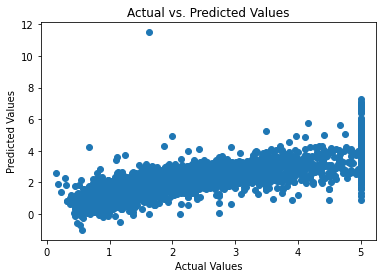

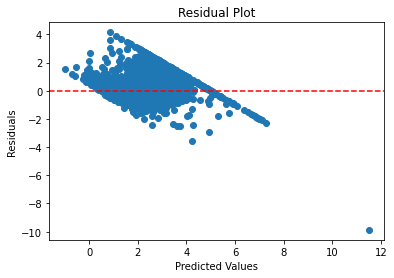

In [7]:
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


### b. Normality of Residuals

The residuals should be approximately normally distributed.

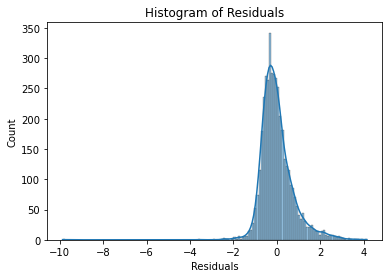

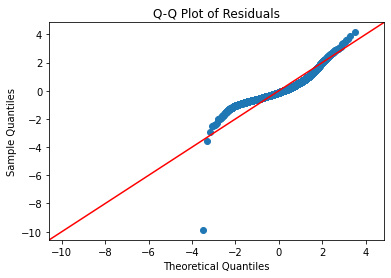

In [10]:
# Histogram of residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

# Q-Q plot
import statsmodels.api as sm
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()


### c. Homoscedasticity

The residuals should have constant variance.

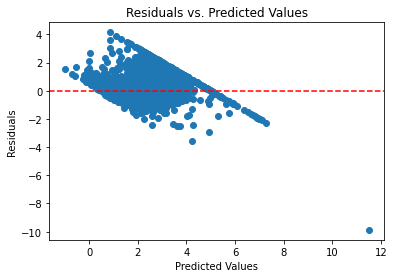

In [12]:
# Plot residuals vs. predicted values to check for homoscedasticity
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


### d. Multicollinearity

Check for multicollinearity among the predictor variables using the Variance Inflation Factor (VIF).

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


      feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


## 6. Model Evaluation
Evaluate the performance of the model using metrics such as Mean Squared Error (MSE) and R-squared (R²).

In [15]:
# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')



Mean Squared Error: 0.56
R-squared: 0.58


## 7. Feature Selection
Feature selection helps in improving model performance by including only the most significant predictors

In [16]:
from sklearn.feature_selection import RFE

# Initialize RFE with the linear regression model
rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)

# Fit RFE
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]
print(f'Selected Features: {selected_features}')


Selected Features: Index(['MedInc', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude'], dtype='object')


## b. Lasso Regression

Lasso regression helps in feature selection by applying L1 regularization, which can shrink some coefficients to zero.

MedInc        0.392693
HouseAge      0.015081
AveRooms     -0.000000
AveBedrms     0.000000
Population    0.000016
AveOccup     -0.003149
Latitude     -0.114291
Longitude    -0.099308
dtype: float64


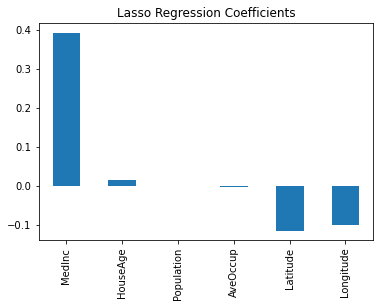

In [17]:
from sklearn.linear_model import Lasso

# Initialize and train Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Get the coefficients
lasso_coef = pd.Series(lasso.coef_, index=X.columns)
print(lasso_coef)

# Plot the coefficients
lasso_coef[lasso_coef != 0].plot(kind='bar')
plt.title('Lasso Regression Coefficients')
plt.show()



In [18]:
# Selected features from RFE
selected_features = ['MedInc', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude']

# Subset the training and testing data with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


In [19]:
# Initialize and train the linear regression model with selected features
model_selected = LinearRegression()
model_selected.fit(X_train_selected, y_train)

# Make predictions on the test set with selected features
y_pred_selected = model_selected.predict(X_test_selected)


In [20]:
# Calculate MSE and R-squared for the model with selected features
mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)

print(f'Mean Squared Error with Selected Features: {mse_selected:.2f}')
print(f'R-squared with Selected Features: {r2_selected:.2f}')


Mean Squared Error with Selected Features: 0.57
R-squared with Selected Features: 0.57


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model with the selected features
rf_model.fit(X_train_selected, y_train)

# Make predictions on the test set with the selected features
y_pred_rf = rf_model.predict(X_test_selected)

# Calculate MSE and R-squared for the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error with Random Forest: {mse_rf:.2f}')
print(f'R-squared with Random Forest: {r2_rf:.2f}')


Mean Squared Error with Random Forest: 0.24
R-squared with Random Forest: 0.82


In [22]:
y_train

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
         ...  
11284    2.292
11964    0.978
5390     2.221
860      2.835
15795    3.250
Name: MEDV, Length: 16512, dtype: float64

In [23]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Train the model with the selected features
xgb_model.fit(X_train_selected, y_train)

# Make predictions on the test set with the selected features
y_pred_xgb = xgb_model.predict(X_test_selected)

# Calculate MSE and R-squared for the XGBoost model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'Mean Squared Error with XGBoost: {mse_xgb:.2f}')
print(f'R-squared with XGBoost: {r2_xgb:.2f}')


Mean Squared Error with XGBoost: 0.23
R-squared with XGBoost: 0.82


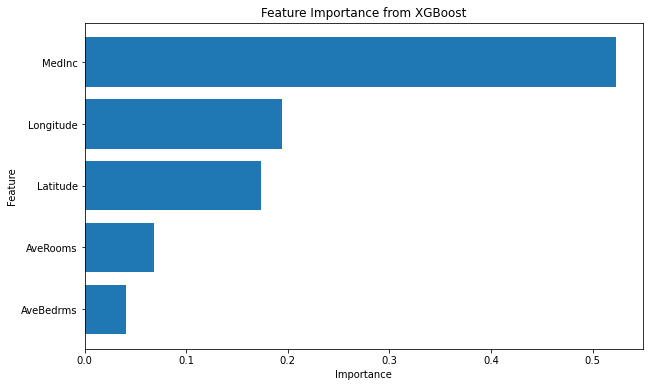

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract feature importances
feature_importances = xgb_model.feature_importances_
features = X_train_selected.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from XGBoost')
plt.gca().invert_yaxis()
plt.show()
